**Importing necessary libraries**

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Data From Data Set

In [64]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
# here we calculates the count of null (missing) values in each column of the data in Data set and prints the result.
null_counts=data.isnull().sum()
print(null_counts)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Encoding categorical variables**

In [102]:

label_encoders = {}
for column in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 

In [103]:
data

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350          1               2   0.742527           2   
1     1.322365          0               1  -1.297775           1   
2     0.008343          1               2   1.414363           1   
3    -0.429664          0               1   1.461466           1   
4    -1.086676          0               2  -0.524295           1   
...        ...        ...             ...        ...         ...   
1465 -0.101159          0               1   0.202082           1   
1466  0.227347          0               2  -0.469754           1   
1467 -1.086676          0               2  -1.605183           1   
1468  1.322365          0               1   0.546677           2   
1469 -0.320163          0               2  -0.432568           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0            -1.010909          2               1              1   
1            -0.147150          1               1              1   
2            -0.887515          2               4              1   
3            -0.764121          4               1              1   
4            -0.887515          1               3              1   
...                ...        ...             ...            ...   
1465          1.703764          2               3              1   
1466         -0.393938          1               3              1   
1467         -0.640727          3               1              1   
1468         -0.887515          3               3              1   
1469         -0.147150          3               3              1   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0                  1  ...                         1             80   
1                  2  ...                         4             80   
2                  4  ...                         2             80   
3                  5  ...                         3             80   
4                  7  ...                         4             80   
...              ...  ...                       ...            ...   
1465            2061  ...                         3             80   
1466            2062  ...                         1             80   
1467            2064  ...                         2             80   
1468            2065  ...                         4             80   
1469            2068  ...                         1             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0          -0.421642              -2.171982   
1                    1          -0.164511               0.155707   
2                    0          -0.550208               0.155707   
3                    0          -0.421642               0.155707   
4                    1          -0.678774               0.155707   
...                ...                ...                    ...   
1465                 1           0.735447               0.155707   
1466                 1          -0.293077               1.707500   
1467                 1          -0.678774              -2.171982   
1468                 0           0.735447               0.155707   
1469                 0          -0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1       -0.164613           -0.063296   
1                   3        0.488508            0.764998   
2                   3       -1.144294           -1.167687   
3                   3        0.161947            0.764998   
4                   3       -0.817734           -0.615492   
...               ...             ...                 ...   
1465                3       -0.327893           -0.615492   
1466                3       -0.001333            0.764998   
1467                3       -0.164613           -0.615492   
1468                2        0.325228            0.488900   
1469                4       -0.491174           

**Normalizing numerical features**

In [ ]:

scaler = StandardScaler()
num_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
               'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
               'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
data[num_columns] = scaler.fit_transform(data[num_columns])

**distribution of attrition across different departments, job roles, and years of experience**

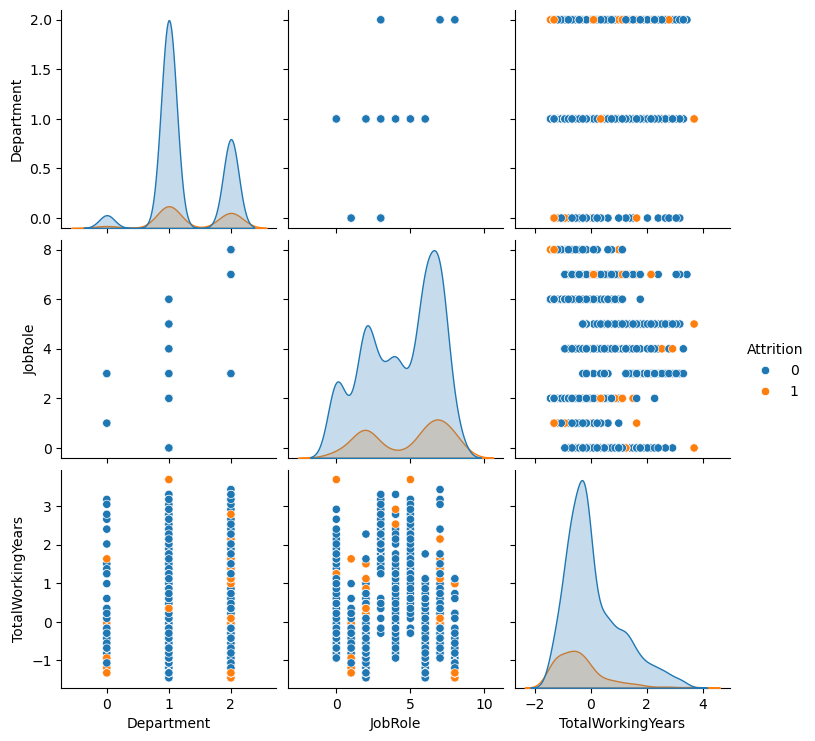

In [70]:
sns.pairplot(data , vars=['Department','JobRole','TotalWorkingYears',],hue='Attrition')
plt.show()


**Model Building**

In [106]:
# Specifying x and y values
X = data.drop(columns=['Attrition']) #This line removes the Attrition column from the dataset data and assigns the remaining columns to X
y = data['Attrition'] #This line extracts the Attrition column from data and assigns it to y, which will serve as the target variable


In [107]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])  # Use the same encoder for X_test
    label_encoders[column] = le

Here I encountered some errors while training my model, so I used label encoders to convert all string data into float and integer values

In [110]:
print(X.dtypes)

Age                         float64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                     int64
EducationField                int64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears           

In [118]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [120]:
#Model Evaluation
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [121]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.891156462585034
Precision: 0.6842105263157895
Recall: 0.3333333333333333
F1 Score: 0.4482758620689655


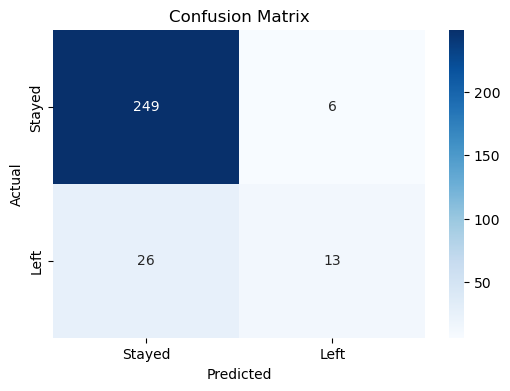

In [122]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()